In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')
from mpltools import style
style.use('ggplot')

<h2>MOM inferred Poisson</h2>

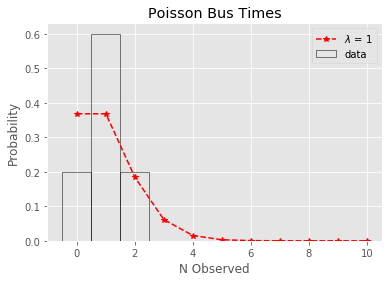

0.367879441171


In [2]:
from scipy.stats import poisson
fig, ax = plt.subplots(1, 1)
x = np.arange(0,11)
ax.hist([1,1,2,0,1], bins=[z-.5 for z in range(11)], fill=None, edgecolor='black', normed=1, label='data')
ax.plot(x, poisson.pmf(x, 1), 'r*--', label=r"$\lambda$ = 1")
ax.set_title("Poisson Bus Times")
ax.set_ylabel("Probability")
ax.set_xlabel("N Observed")
ax.legend(loc='upper right')
plt.show()

print(poisson.pmf(0,1))

<h2>MOM inferred Binomial</h2>

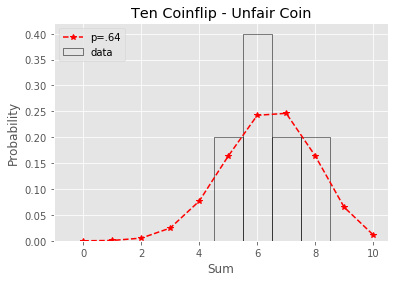

0.729158464263


In [3]:
from scipy.stats import binom
fig, ax = plt.subplots(1, 1)
n, p = 10, 0.64
x = np.arange(0,11)
ax.hist([7,6,8,6,5], bins=[z-.5 for z in range(11)], fill=None, edgecolor='black', normed=1, label='data')
ax.plot(x, binom.pmf(x, n, p), 'r*--', label='p=.64')
ax.set_title("Ten Coinflip - Unfair Coin")
ax.set_ylabel("Probability")
ax.set_xlabel("Sum")
ax.legend(loc='upper left')
plt.show()

print(1-binom.cdf(5, 10, .64))

<h2>Normal Distribution - MLE</h2>
<p>We start by creating Guassian Random data</p>

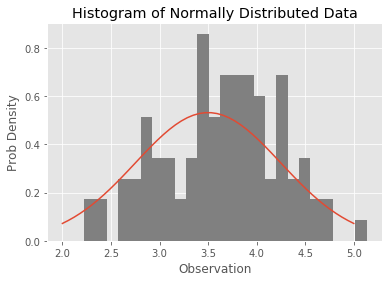

In [4]:
from scipy.stats import norm
mu, sig = 3.5, .75
data = np.random.normal(mu, sig, 100)
# create a histogram of the data
fig, ax = plt.subplots(1, 1)
ax.hist(data, label='Data', bins=25, color='grey', normed=True)
_x = np.linspace(2,5)
ax.plot(_x, norm.pdf(_x, mu, sig))
ax.set_title("Histogram of Normally Distributed Data")
ax.set_ylabel("Prob Density")
ax.set_xlabel("Observation")
plt.show()

<p>we'll be using a 'brute-force' approximation called grid search.  In practice, this is not how to optimize the paramters for a function, but it'll give you a flavor of how it can be approached</p>

In [5]:
def log_likelihood_normal_two_parameters(mu, sigma_sq):
    likelihoods = [norm.pdf(datum, mu, sigma_sq) for datum in data]
    return np.sum(np.log(likelihoods))

def minus_log_likelihood_normal_two_parameters(mu, sigma):
    return - log_likelihood_normal_two_parameters(mu, sigma)

In [6]:
from itertools import product
fits = [(log_likelihood_normal_two_parameters(mu, sigma_sq), mu, sigma_sq) \
        for mu, sigma_sq in product([3, 3.5, 4], [.5, .75, 1])]

for fit in sorted(fits, key=lambda x: x[0], reverse=True):
    print("The value of mu={} and sigma_sq={} have log likelihood of {}".format(fit[1], fit[2], fit[0]))

The value of mu=3.5 and sigma_sq=0.75 have log likelihood of -97.49937497610524
The value of mu=3.5 and sigma_sq=0.5 have log likelihood of -99.9200252913089
The value of mu=4 and sigma_sq=0.75 have log likelihood of -108.19336372874855
The value of mu=3.5 and sigma_sq=1 have log likelihood of -111.2290758271763
The value of mu=4 and sigma_sq=1 have log likelihood of -117.24444450053817
The value of mu=4 and sigma_sq=0.5 have log likelihood of -123.98149998475633
The value of mu=3 and sigma_sq=1 have log likelihood of -130.21370715381445
The value of mu=3 and sigma_sq=0.75 have log likelihood of -131.2498306679064
The value of mu=3 and sigma_sq=0.5 have log likelihood of -175.85855059786147


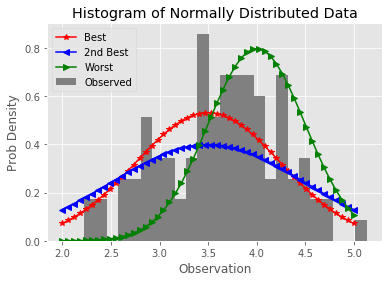

In [7]:
# create a histogram of the data with 3 best fits
fig, ax = plt.subplots(1, 1)
ax.hist(data, bins=25, color='grey', normed=True, label='Observed')
_x = np.linspace(2,5)
ax.plot(_x, norm.pdf(_x, 3.5, .75), 'r*-', label='Best')
ax.plot(_x, norm.pdf(_x, 3.5, 1), 'b<-', label='2nd Best')
ax.plot(_x, norm.pdf(_x, 4, .5), 'g>-', label='Worst')
ax.set_title("Histogram of Normally Distributed Data")
ax.set_ylabel("Prob Density")
ax.set_xlabel("Observation")
ax.legend(loc='upper left')
plt.show()

<h2>KDE</h2>

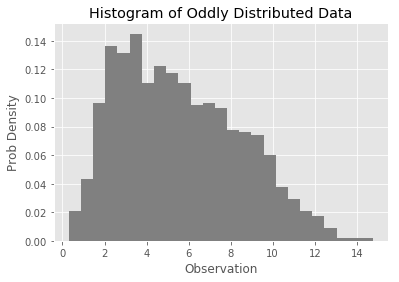

In [8]:
data = np.concatenate((np.random.normal(8, 2, size=400), np.random.gamma(4, 1, size=600)))
# create a histogram of the data
fig, ax = plt.subplots(1, 1)
ax.hist(data, label='Data', bins=25, color='grey', normed=True)
ax.set_title("Histogram of Oddly Distributed Data")
ax.set_ylabel("Prob Density")
ax.set_xlabel("Observation")
plt.show()

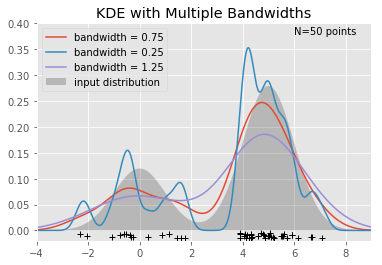

In [27]:
from sklearn.neighbors import KernelDensity
# Plot a 1D density example
N = 50
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')

for bw in [.75, .25, 1.25]:
    kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="bandwidth = {0}".format(bw))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.set_title("KDE with Multiple Bandwidths")
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()